# Clustering 

Unsupervised Learning is said to embody the essence of Artificial Intelligence. That’s because there’s not much human supervision or intervention. As a result, the algorithms are left on their own to discover things from data. This is especially the case in Clustering wherein the goal is to reveal organic aggregates or “clusters” in data.

## Goals & Uses of Clustering 


This is a form of Unsupervised Learning where there are no labels or in many cases there are no truly correct answers. That’s because there were no correct answers in the first place. We just have a dataset and our goal is to see the groupings that have organically formed. 

We’re not trying to predict an outcome here. The goal is to look for structures in the data.  In other words, we’re “dividing” the dataset into groups wherein members have some similarities or proximities. For example, each ecommerce customer might belong to a particular group (e.g. given their income and spending level). If we have gathered enough data points, it’s likely there are aggregates. 

At first the data points will seem scattered (no pattern at all). But once we apply a Clustering algorithm, the data will somehow make sense because we’ll be able to easily visualize the groups or clusters. Aside from discovering the natural groupings, Clustering algorithms may also reveal outliers for Anomaly Detection (we’ll also discuss this later). 

Clustering is being applied regularly in the fields of marketing, biology, earthquake studies, manufacturing, sensor outputs, product categorization, and other scientific and business areas. However, there are no rules set in stone when it comes to determining the number of clusters and which data point should belong to a certain cluster. It’s up to our objective (or if the results are useful enough). This is also where our expertise in a particular domain comes in. 

## K-Means Clustering 

One way to make sense of data through Clustering is by K-Means. It’s one of the most popular Clustering algorithms because of its simplicity. It works by partitioning objects into k clusters (number of clusters we specified) based on feature similarity. 

Notice that the number of clusters is arbitrary. We can set it into any number we like. However, it’s good to make the number of clusters just enough to make our work meaningful and useful. Let’s discuss an example to illustrate this. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 
dataset = pd.read_csv('Mall_Customers.csv') 
dataset.head(10) 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In this example we’re more interested in grouping the Customers according to their Annual Income and Spending Score. 

In [2]:
X = dataset.iloc[:, [3, 4]].values 

Our goal here is to reveal the clusters and help the marketing department formulate their strategies. For instance, we might subdivide the Customers in 5 distinct groups: 

1.Medium Annual Income, Medium Spending Score;
2.High Annual Income, Low Spending Score; 
3.Low Annual Income, Low Spending Score; 
4.Low Annual Income, High Spending Score; 
5.High Annual Income, High Spending Score; 

It’s worthwhile to pay attention to the #2 Group (High Annual Income, Low Spending Score). If there’s a sizable number of customers that fall under this group, it could mean a huge opportunity for the mall. These customers have high Annual Income and yet they’re spending or using most of their money elsewhere (not in the Mall). If we could know that they’re in sufficient numbers, the marketing department could formulate specific strategies to entice Cluster #2 to buy more from the Mall. 

Although the number of clusters is often arbitrary, there are ways to find that optimal number. One such way is through the Elbow Method and WCSS (within-cluster sums of squares). Here’s the code to accomplish this: 

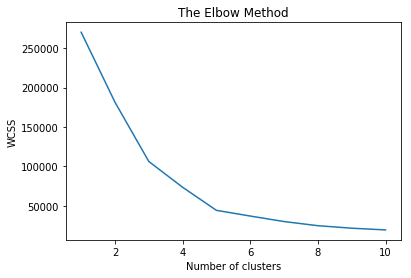

In [3]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show() 

Notice that the “elbow” points at 5 (number of clusters). Coincidentally, this number was also the “desired” number of groups that will subdivide the dataset according to their Annual Income and Spending Score. 

After determining the optimal number of clusters, we can then proceed with applying K-Means to the dataset and then performing data visualization: 

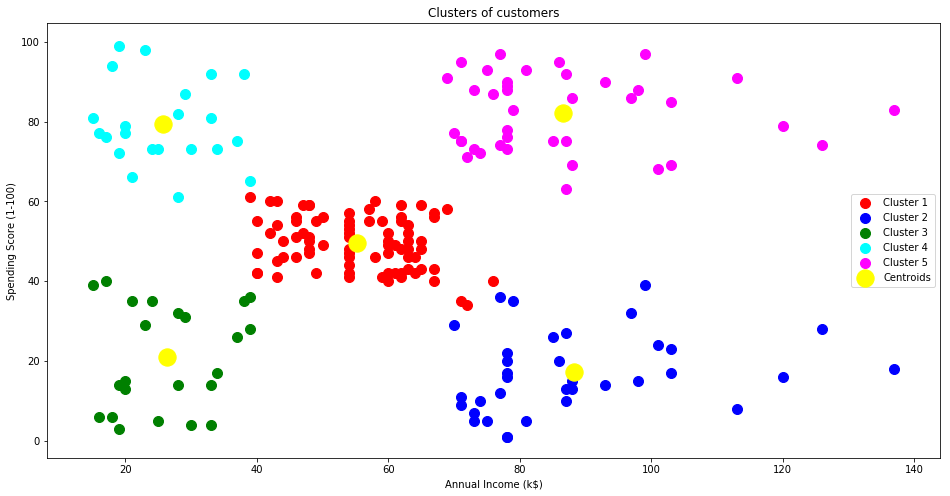

In [6]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X) 
plt.figure(figsize=(16,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show() 

There we have it. We have 5 clusters and Cluster #2 (blue points, High Annual Income and Low Spending Score) is significant enough. It might be worthwhile for the marketing department to focus on that group. 

Also notice the Centroids (the yellow points). This is a part of how K-Means clustering works. It’s an iterative approach where random points are placed initially until they converge to a minimum (e.g. sum of distances is minimized). As mentioned earlier, it can all be arbitrary and it may depend heavily on our judgment and possible application. We can set n_clusters into anything other than 5. We only used the Elbow Method so we can have a more sound and consistent basis for the number of clusters. But it’s still up to our judgment what should we use and if the results are good enough for our application.

## Anomaly Detection 


Aside from revealing the natural clusters, it’s also a common case to see if there are obvious points that don’t belong to those clusters. This is the heart of detecting anomalies or outliers in data. 

This is a crucial task because any large deviation from the normal can cause a catastrophe. Is a credit card transaction fraudulent? Is a login activity suspicious (you might be logging in from a totally different location or device)? Are the temperature and pressure levels in a tank being maintained consistently (any outlier might cause explosions and operational halt)? Is a certain data point caused by wrong entry or measurement (e.g. perhaps inches were used instead of centimeters)? 

With straightforward data visualization we can immediately see the outliers. We can then evaluate if these outliers present a major threat. We can also see and assess those outliers by referring to the mean and standard deviation. If a data point deviates by a standard deviation from the mean, it could be an anomaly. 


This is also where our domain expertise comes in. If there’s an anomaly, how serious are the consequences? For instance, there might be thousands of purchase transactions happening in an online store every day. If we’re too tight with our anomaly detection, many of those transactions will be rejected (which results to loss of sales and profits). On the other hand, if we’re allowing much freedom in our anomaly detection our system would approve more transactions. However, this might lead to complaints later and possibly loss of customers in the long term. 

Notice here that it’s not all about algorithms especially when we’re dealing with business cases. Each field might require a different sensitivity level. There’s always a tradeoff and either of the options could be costly. It’s a matter of testing and knowing if our system of detecting anomalies is sufficient for our application. 

## Association Rule Learning 

This is a continuation of Unsupervised Learning. In the previous chapter we’ve discovered natural patterns and aggregates in Mall_Customers.csv. There was not much supervision and guidance on how the “correct answers” should look like. We’ve allowed the algorithms to discover and study the data. As a result, we’re able to gain insights from the data that we can use. 

The goal of Association Rule Learning here is discover how items are “related” or associated with one another. This can be very useful in determining which products should be placed together in grocery stores. For instance, many customers might always be buying bread and milk together. We can then rearrange some shelves and products so the bread and milk will be near to each other. 

This can also be a good way to recommend related products to customers. For example, many customers might be buying diapers online and then purchasing books about parenting later. These two products have strong associations because they mark the customer’s life transition (having a baby). Also if we notice a demand surge in diapers, we might also get ready with parenting books. This is a good way to somehow forecast and prepare for future demands by buying supplies in advance. 

In grocery shopping or any business involved in retail and wholesale transactions, Association Rule Learning can be very useful in optimization (encouraging customers to buy more products) and matching supply with demand (e.g. sales improvement in one product also signals the same thing to another related product). 

### Explanation 

So how do we determine the “level of relatedness” of items to one another and create useful groups out of it.? One straightforward approach is by counting the transactions that involve a particular set. For example, we have the following transactions: 1.Egg, ham, hotdog;2.Egg, ham, milk; 3.Egg, apple, onion; 4.Beer, milk, juice.

Our target set is {Egg, ham}. Notice that this combination of purchases occurred in 2 transactions (Transactions 1 and 2). In other words, this combination happened 50% of the time. It’s a simple example but if we’re studying 10,000 transactions and 50% is still the case, of course there’s a strong association between egg and ham. 

We might then realize that it’s worthwhile to put eggs and hams together (or offer them in a bundle) to make our customers’ lives easier (while we also make more sales). The higher the percentage of our target set in the total transactions, the better.  Or, if the percentage still falls under our arbitrary threshold (e.g. 30%, 20%), we could still pay attention to a particular set and make adjustments to our products and offers. 

Aside from calculating the actual percentage, another way to know how “popular” an itemset is by working on probabilities. For example, how likely is product X to appear with product Y? If there’s a high probability, we can somehow say that the two products are closely related. 

Those are ways of estimating the “relatedness” or level of association between two products. One or a combination of approaches might be already enough for certain applications. Perhaps working on probabilities yields better results. Or, prioritising a very popular itemset (high percentage of occurrence) results to more transactions. 

In the end, it might be about testing different approaches (and combinations of products) and then seeing which one yields the optimal results. It might be even the case that a combination of two products with very low relatedness allow for more purchases to happen. 

### Apriori 

Whichever is the case, let’s explore how it all applies to the real world. Let’s call the problem “Market Basket Optimization.” Our goal here is to generate a list of sets (product sets) and their corresponding level of relatedness or support to one another. 

In [8]:
import pandas as pd
dataset = pd.read_csv('Market_Basket_Optimisation.csv', header = None) 
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Next is we add the items in a list so that we can work on them much easier. We can accomplish this by initializing an empty list and then running a for loop (still remember how to do all these?): 

In [12]:
transactions = []
for i in range(0, 7501):
    transactions.append([str(dataset.values[i,j]) for j in range(0, 20)]) 
print(transactions[0:10])

[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['chutney', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['turkey', 'avocado', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['low fat yogurt', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan

After we’ve done that, we should then generate a list of “related products” with their corresponding level of support or relatedness. One way to accomplish this is by the implementation of the Apriori algorithm (for association rule learning). We can use Apyori which is a simple implementation of the Apriori algorithm. You can find it here for your reference: 
https://pypi.org/project/apyori/#description 

To implement Apyori, we can import it similarly as how we import other libraries: 

In [14]:
from apyori import apriori 

Next is we set up the rules (the levels of minimum relatedness) so we can somehow generate a useful list of related items. That’s because almost any two items might have some level of relatedness. The objective here is to include only the list that could be useful for us. 

In [15]:
rules = apriori(transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)

Well that’s the implementation of Apriori using Apyori. The next step is to generate and view the results. We can accomplish this using the following block of code: 

In [16]:
results = list(rules)
results_list = []
for i in range(0, len(results)):
    results_list.append('RULE:\t' + str(results[i][0]) + '\nSUPPORT:\t' + str(results[i][1]))
print (results_list) 

["RULE:\tfrozenset({'chicken', 'light cream'})\nSUPPORT:\t0.004532728969470737", "RULE:\tfrozenset({'mushroom cream sauce', 'escalope'})\nSUPPORT:\t0.005732568990801226", "RULE:\tfrozenset({'escalope', 'pasta'})\nSUPPORT:\t0.005865884548726837", "RULE:\tfrozenset({'fromage blanc', 'honey'})\nSUPPORT:\t0.003332888948140248", "RULE:\tfrozenset({'herb & pepper', 'ground beef'})\nSUPPORT:\t0.015997866951073192", "RULE:\tfrozenset({'tomato sauce', 'ground beef'})\nSUPPORT:\t0.005332622317024397", "RULE:\tfrozenset({'olive oil', 'light cream'})\nSUPPORT:\t0.003199573390214638", "RULE:\tfrozenset({'olive oil', 'whole wheat pasta'})\nSUPPORT:\t0.007998933475536596", "RULE:\tfrozenset({'shrimp', 'pasta'})\nSUPPORT:\t0.005065991201173177", "RULE:\tfrozenset({'milk', 'spaghetti', 'avocado'})\nSUPPORT:\t0.003332888948140248", "RULE:\tfrozenset({'burgers', 'cake', 'milk'})\nSUPPORT:\t0.0037328356219170776", "RULE:\tfrozenset({'turkey', 'burgers', 'chocolate'})\nSUPPORT:\t0.0030662578322890282", "RU

It’s messy and almost incomprehensible. But if you run it in Spyder (another useful data science package included in Anaconda installation), the result will look a bit neater:

![jupyter](./spyder.png)

Notice that there are different itemsets with their corresponding “Support.” The higher the Support, we can somehow say that the higher the relatedness. For instance, light cream and chicken often go together because people might be using the two to cook something. Another example is in the itemset with an index of 5 (tomato sauce and ground beef). These two items might always go together in the grocery bag because they’re also used to prepare a meal or a recipe. 

This is only an introduction of Association Rule Learning. The goal here was to explore the potential applications of it to real-world scenarios such as market basket optimization. There are other more sophisticated ways to do this. But in general, it’s about determining the level of relatedness among the items and then evaluating that if it’s useful or good enough. 